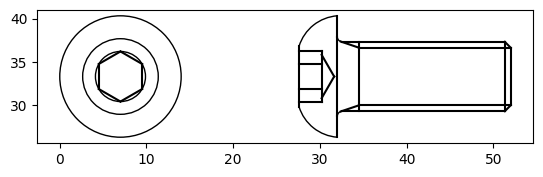

In [ ]:
# env: zumen
import ezdxf
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Arc

# DXFファイルのパス
dxf_file_path = '/home/kfujii/image-retrieval-transformers/assets/CADs/22_Screws_Bolts_Washers_Nuts/2d_SBCB/sbcb08-25.dxf'

# DXFファイルを読み込み
doc = ezdxf.readfile(dxf_file_path)
msp = doc.modelspace()

# 描画の準備
fig, ax = plt.subplots()

for e in msp:
    # 中心線(CENTERやMSM_CENTERレイヤー)を除外
    if e.dxf.layer != 'CENTER' and e.dxf.layer != 'MSM_CENTER':
        if e.dxftype() == 'LINE':  # 直線
            start, end = e.dxf.start, e.dxf.end
            ax.plot([start.x, end.x], [start.y, end.y], 'k')

        elif e.dxftype() == 'CIRCLE':  # 円
            center, radius = e.dxf.center, e.dxf.radius
            circle = Circle((center.x, center.y), radius, edgecolor='k', fill=False)
            ax.add_patch(circle)

        elif e.dxftype() == 'ARC':  # 弧
            center = e.dxf.center
            radius = e.dxf.radius
            start_angle = e.dxf.start_angle
            end_angle = e.dxf.end_angle
            arc = Arc((center.x, center.y), 2*radius, 2*radius, angle=0, theta1=start_angle, theta2=end_angle, edgecolor='k')
            ax.add_patch(arc)

        elif e.dxftype() == 'POLYLINE':  # ポリライン
            points = e.points()
            x_coords = [point[0] for point in points]
            y_coords = [point[1] for point in points]
            ax.plot(x_coords, y_coords, 'k')

        elif e.dxftype() == 'LWPOLYLINE':  # 軽量ポリライン
            points = e.get_points('xy')
            x_coords = [point[0] for point in points]
            y_coords = [point[1] for point in points]
            ax.plot(x_coords, y_coords, 'k')

        elif e.dxftype() == 'SPLINE':  # スプライン
            fit_points = e.fit_points
            x_coords = [point.x for point in fit_points]
            y_coords = [point.y for point in fit_points]
            ax.plot(x_coords, y_coords, 'k')

# 軸の設定
ax.set_aspect('equal')
plt.savefig('output.jpg', dpi=300)

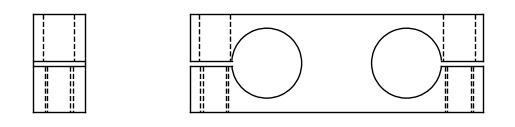

In [2]:
import ezdxf
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Arc

# DXFファイルのパス
dxf_file_path = '/home/kfujii/image-retrieval-transformers/data/dxf/03_Connecting_Parts/2d_C-PHSC/c-phsc05.dxf'
dxf_file_path = '/home/kfujii/image-retrieval-transformers/data/dxf/03_Connecting_Parts/2d_CLKWB/clkwb20.dxf'


# DXFファイルを読み込み
doc = ezdxf.readfile(dxf_file_path)
msp = doc.modelspace()

# Matplotlibの線種マッピング (DXFのlinetypeに対応)
linetype_mapping = {
    'CONTINUOUS': '-',  # 実線
    'DASHED': '--',     # 破線
    'DOTTED': ':',      # 点線
    'CENTER': '-.',     # 中心線
}

# 描画の準備
fig, ax = plt.subplots()

# 線の太さを統一
line_width = 1.0

for e in msp:
    # 中心線(CENTERやMSM_CENTERレイヤー)を除外
    if e.dxf.layer != 'CENTER' and e.dxf.layer != 'MSM_CENTER':
        # DXFエンティティのlinetypeを取得
        linetype = e.dxf.linetype if e.dxf.hasattr('linetype') else 'CONTINUOUS'
        linestyle = linetype_mapping.get(linetype, '-')  # マッピングされていない場合は実線

        if e.dxftype() == 'LINE':  # 直線
            start, end = e.dxf.start, e.dxf.end
            ax.plot([start.x, end.x], [start.y, end.y], color='k', linestyle=linestyle, linewidth=line_width)

        elif e.dxftype() == 'CIRCLE':  # 円
            center, radius = e.dxf.center, e.dxf.radius
            circle = Circle((center.x, center.y), radius, edgecolor='k', fill=False, linestyle=linestyle, linewidth=line_width)
            ax.add_patch(circle)

        elif e.dxftype() == 'ARC':  # 弧
            center = e.dxf.center
            radius = e.dxf.radius
            start_angle = e.dxf.start_angle
            end_angle = e.dxf.end_angle
            arc = Arc((center.x, center.y), 2*radius, 2*radius, angle=0, theta1=start_angle, theta2=end_angle, edgecolor='k', linestyle=linestyle, linewidth=line_width)
            ax.add_patch(arc)

        elif e.dxftype() == 'POLYLINE':  # ポリライン
            points = [vertex.dxf.location for vertex in e.vertices]  # VERTEXの座標を取得
            x_coords = [point.x for point in points]
            y_coords = [point.y for point in points]
            
            # ポリラインが閉じている場合の処理
            if e.is_closed:
                x_coords.append(points[0].x)  # 最初の頂点を追加して閉じる
                y_coords.append(points[0].y)
            
            ax.plot(x_coords, y_coords, color='k', linestyle=linestyle, linewidth=line_width)

        elif e.dxftype() == 'LWPOLYLINE':  # 軽量ポリライン
            points = e.get_points('xy')
            x_coords = [point[0] for point in points]
            y_coords = [point[1] for point in points]
            ax.plot(x_coords, y_coords, color='k', linestyle=linestyle, linewidth=line_width)

        elif e.dxftype() == 'SPLINE':  # スプライン
            fit_points = e.fit_points
            x_coords = [point.x for point in fit_points]
            y_coords = [point.y for point in fit_points]
            ax.plot(x_coords, y_coords, color='k', linestyle=linestyle, linewidth=line_width)

ax.axis('off')
# 軸の設定
ax.set_aspect('equal')
plt.savefig('output_with_hidden_lines.png', dpi=300, bbox_inches='tight', pad_inches=0)


In [ ]:
import os
import ezdxf
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Arc

# DXFファイルが保存されているフォルダと、保存先のフォルダ
input_dir = '/home/kfujii/image-retrieval-transformers/data/dxf/03_Connecting_Parts'
output_dir = '/home/kfujii/image-retrieval-transformers/data/original/03_Connecting_Parts'

# 出力用ディレクトリの作成
def ensure_output_dir_structure(input_dir, output_dir):
    # ルート出力ディレクトリが存在しない場合は作成
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

# DXFファイルを画像に変換して保存する関数
def dxf_to_image(input_filepath, output_filepath):
    try:
        # DXFファイルを読み込み
        doc = ezdxf.readfile(dxf_file_path)
        msp = doc.modelspace()

        # Matplotlibの線種マッピング (DXFのlinetypeに対応)
        linetype_mapping = {
            'CONTINUOUS': '-',  # 実線
            'DASHED': '--',     # 破線
            'DOTTED': ':',      # 点線
            'CENTER': '-.',     # 中心線
        }

        # 描画の準備
        fig, ax = plt.subplots()

        # 線の太さを統一
        line_width = 1.0

        for e in msp:
            # 中心線(CENTERやMSM_CENTERレイヤー)を除外
            if e.dxf.layer != 'CENTER' and e.dxf.layer != 'MSM_CENTER':
                # DXFエンティティのlinetypeを取得
                linetype = e.dxf.linetype if e.dxf.hasattr('linetype') else 'CONTINUOUS'
                linestyle = linetype_mapping.get(linetype, '-')  # マッピングされていない場合は実線

                if e.dxftype() == 'LINE':  # 直線
                    start, end = e.dxf.start, e.dxf.end
                    ax.plot([start.x, end.x], [start.y, end.y], color='k', linestyle=linestyle, linewidth=line_width)

                elif e.dxftype() == 'CIRCLE':  # 円
                    center, radius = e.dxf.center, e.dxf.radius
                    circle = Circle((center.x, center.y), radius, edgecolor='k', fill=False, linestyle=linestyle, linewidth=line_width)
                    ax.add_patch(circle)

                elif e.dxftype() == 'ARC':  # 弧
                    center = e.dxf.center
                    radius = e.dxf.radius
                    start_angle = e.dxf.start_angle
                    end_angle = e.dxf.end_angle
                    arc = Arc((center.x, center.y), 2*radius, 2*radius, angle=0, theta1=start_angle, theta2=end_angle, edgecolor='k', linestyle=linestyle, linewidth=line_width)
                    ax.add_patch(arc)

                elif e.dxftype() == 'POLYLINE':  # ポリライン
                    points = [vertex.dxf.location for vertex in e.vertices]  # VERTEXの座標を取得
                    x_coords = [point.x for point in points]
                    y_coords = [point.y for point in points]
                    
                    # ポリラインが閉じている場合の処理
                    if e.is_closed:
                        x_coords.append(points[0].x)  # 最初の頂点を追加して閉じる
                        y_coords.append(points[0].y)
                    
                    ax.plot(x_coords, y_coords, color='k', linestyle=linestyle, linewidth=line_width)

                elif e.dxftype() == 'LWPOLYLINE':  # 軽量ポリライン
                    points = e.get_points('xy')
                    x_coords = [point[0] for point in points]
                    y_coords = [point[1] for point in points]
                    ax.plot(x_coords, y_coords, color='k', linestyle=linestyle, linewidth=line_width)

                elif e.dxftype() == 'SPLINE':  # スプライン
                    fit_points = e.fit_points
                    x_coords = [point.x for point in fit_points]
                    y_coords = [point.y for point in fit_points]
                    ax.plot(x_coords, y_coords, color='k', linestyle=linestyle, linewidth=line_width)

        ax.axis('off')
        # 軸の設定
        ax.set_aspect('equal')

        # 描画領域を正方形に設定
        plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

        try:
            plt.savefig(output_filepath, dpi=300, bbox_inches='tight', pad_inches=0)
        except:
            print(f'{input_filepath} でエラーが発生しています。')
        plt.close()
    except Exception as e:
        print(f'Error processing {input_filepath}: {e}')

# DXFファイルを再帰的に探索して画像に変換する
def process_all_dxf_files(input_dir, output_dir):
    for root, dirs, files in os.walk(input_dir):
        for file in files:
            if file.lower().endswith('.dxf'):
                input_filepath = os.path.join(root, file)
                base_filename = os.path.splitext(file)[0]  # 拡張子なしのファイル名
                new_filename = base_filename + ".jpg"  # 新しいファイル名の生成
                output_filepath = os.path.join(output_dir, new_filename)

                # 画像を保存
                dxf_to_image(input_filepath, output_filepath)

# フォルダ構造を保持して出力ディレクトリを作成
ensure_output_dir_structure(input_dir, output_dir)

# DXFファイルをすべて処理
process_all_dxf_files(input_dir, output_dir)

Error processing /home/kfujii/image-retrieval-transformers/data/dxf/04_Rotary_Power_Transmission/2d_GEAHF/geahf2_0-21-20-b-8.dxf: File '/home/kfujii/image-retrieval-transformers/data/dxf/04_Rotary_Power_Transmission/2d_GEAHF/geahf2_0-21-20-b-8.dxf' is not a DXF file.
Error processing /home/kfujii/image-retrieval-transformers/data/dxf/04_Rotary_Power_Transmission/2d_GEAHF/geahf2_0-23-20-b-8.dxf: File '/home/kfujii/image-retrieval-transformers/data/dxf/04_Rotary_Power_Transmission/2d_GEAHF/geahf2_0-23-20-b-8.dxf' is not a DXF file.
Error processing /home/kfujii/image-retrieval-transformers/data/dxf/04_Rotary_Power_Transmission/2d_GEAHF/geahf2_0-24-20-b-8.dxf: File '/home/kfujii/image-retrieval-transformers/data/dxf/04_Rotary_Power_Transmission/2d_GEAHF/geahf2_0-24-20-b-8.dxf' is not a DXF file.
Error processing /home/kfujii/image-retrieval-transformers/data/dxf/04_Rotary_Power_Transmission/2d_GEAHF/geahf2_0-28-20-b-8.dxf: File '/home/kfujii/image-retrieval-transformers/data/dxf/04_Rotary

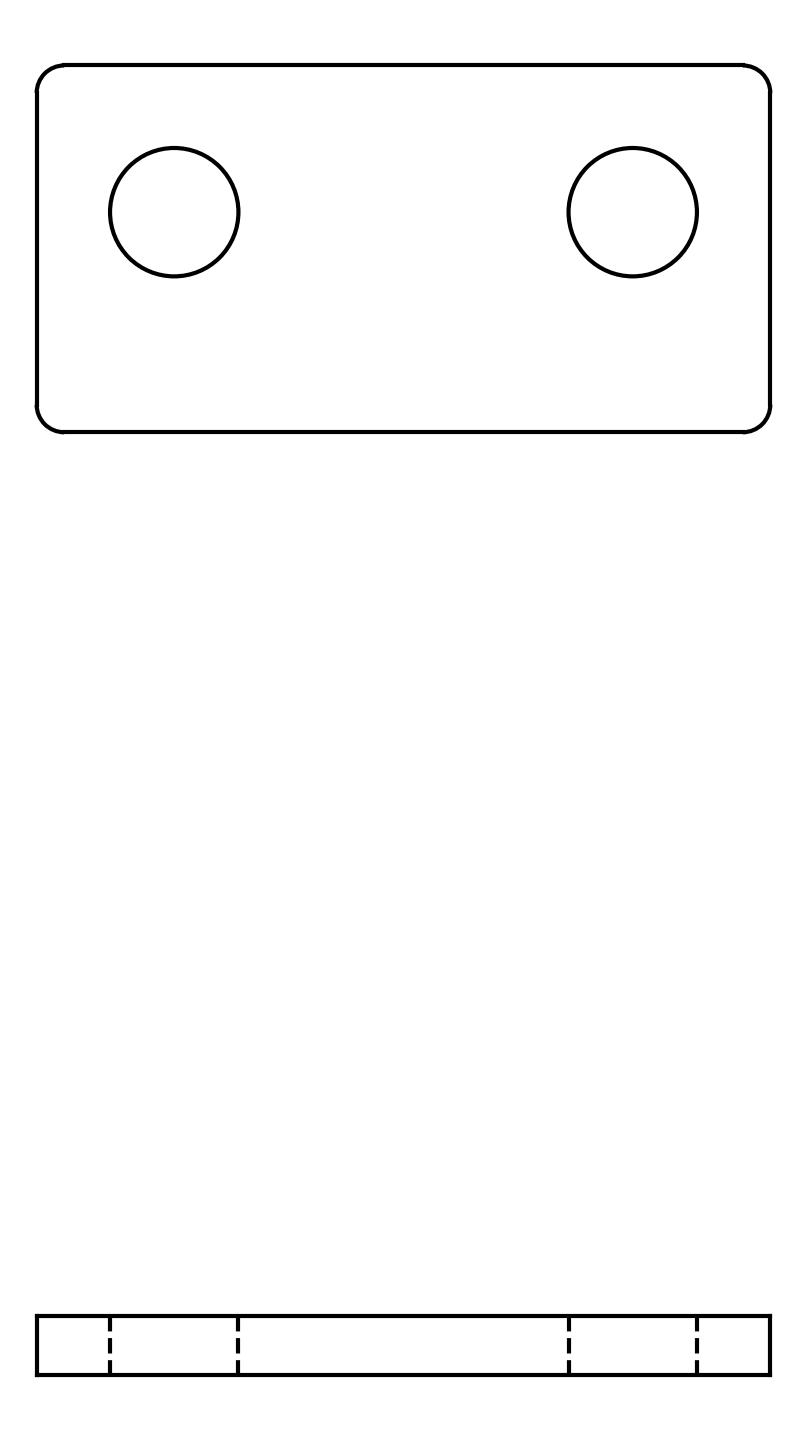

In [4]:
import os
import ezdxf
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Arc
from IPython.display import display, clear_output
from PIL import Image

# DXFファイルが保存されているフォルダと、保存先のフォルダ
input_dir = '/home/kfujii/image-retrieval-transformers/data/dxf/03_Connecting_Parts'
output_dir = '/home/kfujii/image-retrieval-transformers/data/original/03_Connecting_Parts'

# 出力用ディレクトリの作成（サブディレクトリ構造を保持）
def ensure_output_dir_structure_with_subdirs(input_dir, output_dir):
    for root, dirs, _ in os.walk(input_dir):
        for subdir in dirs:
            if subdir.startswith("2d_"):
                # サブディレクトリ名から "2d_" を除く
                new_subdir = subdir[3:]
                new_output_path = os.path.join(output_dir, new_subdir)
                if not os.path.exists(new_output_path):
                    os.makedirs(new_output_path)

# DXFファイルを画像に変換して保存する関数
def dxf_to_image(input_filepath, output_filepath):
    try:
        # DXFファイルを読み込み
        doc = ezdxf.readfile(input_filepath)
        msp = doc.modelspace()

        # Matplotlibの線種マッピング (DXFのlinetypeに対応)
        linetype_mapping = {
            'CONTINUOUS': '-',  # 実線
            'DASHED': '--',     # 破線
            'DOTTED': ':',      # 点線
            'CENTER': '-.',     # 中心線
        }

        # 描画の準備
        fig, ax = plt.subplots()
        line_width = 1.0  # 線の太さを統一
        
        for e in msp:
            # レイヤー名が "CENTER" または "MSM_CENTER" の場合、または線種が "CENTER" の場合はスキップ
            linetype = e.dxf.linetype if e.dxf.hasattr('linetype') else 'CONTINUOUS'
            if e.dxf.layer in ['CENTER', 'MSM_CENTER'] or linetype == 'CENTER':
                continue  # 中央線は描画しない

            # 線種の対応をマッピング
            linetype_mapping = {
                'CONTINUOUS': '-',  # 実線
                'DASHED': '--',     # 破線
                'DOTTED': ':',      # 点線
                'CENTER': '-.',     # 中心線
            }
            linestyle = linetype_mapping.get(linetype, '-')

            if e.dxftype() == 'LINE':  # 直線
                start, end = e.dxf.start, e.dxf.end
                ax.plot([start.x, end.x], [start.y, end.y], color='k', linestyle=linestyle, linewidth=line_width)
            elif e.dxftype() == 'CIRCLE':  # 円
                center, radius = e.dxf.center, e.dxf.radius
                circle = Circle((center.x, center.y), radius, edgecolor='k', fill=False, linestyle=linestyle, linewidth=line_width)
                ax.add_patch(circle)
            elif e.dxftype() == 'ARC':  # 弧
                center = e.dxf.center
                radius = e.dxf.radius
                start_angle, end_angle = e.dxf.start_angle, e.dxf.end_angle
                arc = Arc((center.x, center.y), 2*radius, 2*radius, angle=0, theta1=start_angle, theta2=end_angle, edgecolor='k', linestyle=linestyle, linewidth=line_width)
                ax.add_patch(arc)
            elif e.dxftype() == 'POLYLINE':  # ポリライン
                points = [vertex.dxf.location for vertex in e.vertices]  # VERTEXの座標を取得
                x_coords = [point.x for point in points]
                y_coords = [point.y for point in points]
                
                # ポリラインが閉じている場合の処理
                if e.is_closed:
                    x_coords.append(points[0].x)  # 最初の頂点を追加して閉じる
                    y_coords.append(points[0].y)
                
                ax.plot(x_coords, y_coords, color='k', linestyle=linestyle, linewidth=line_width)

            elif e.dxftype() == 'LWPOLYLINE':  # 軽量ポリライン
                points = e.get_points('xy')
                x_coords = [point[0] for point in points]
                y_coords = [point[1] for point in points]
                ax.plot(x_coords, y_coords, color='k', linestyle=linestyle, linewidth=line_width)

            elif e.dxftype() == 'SPLINE':  # スプライン
                fit_points = e.fit_points
                x_coords = [point.x for point in fit_points]
                y_coords = [point.y for point in fit_points]
                ax.plot(x_coords, y_coords, color='k', linestyle=linestyle, linewidth=line_width)

        ax.axis('off')
        ax.set_aspect('equal')
        plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

        plt.savefig(output_filepath, dpi=300, bbox_inches='tight', pad_inches=0)
        plt.close()

        # ノートブックに画像を表示
        clear_output(wait=True)  # 前の画像を消去
        img = Image.open(output_filepath)
        display(img)

    except Exception as e:
        print(f'Error processing {input_filepath}: {e}')

# DXFファイルを再帰的に探索して画像に変換し、対応するサブディレクトリに保存
def process_all_dxf_files_with_subdirs(input_dir, output_dir):
    for root, dirs, files in os.walk(input_dir):
        for file in files:
            if file.lower().endswith('.dxf'):
                input_filepath = os.path.join(root, file)
                base_filename = os.path.splitext(file)[0]
                new_filename = base_filename + ".jpg"

                # 入力ディレクトリからの相対パスを計算し、新しいサブディレクトリを決定
                relative_path = os.path.relpath(root, input_dir)
                if relative_path.startswith("2d_"):
                    relative_path = relative_path[3:]  # "2d_" を除く

                # 出力先のファイルパスを設定
                output_subdir = os.path.join(output_dir, relative_path)
                output_filepath = os.path.join(output_subdir, new_filename)

                # 必要なディレクトリを作成
                if not os.path.exists(output_subdir):
                    os.makedirs(output_subdir)

                # 画像を保存して表示
                dxf_to_image(input_filepath, output_filepath)

# フォルダ構造を保持して出力ディレクトリを作成
ensure_output_dir_structure_with_subdirs(input_dir, output_dir)

# DXFファイルをすべて処理
process_all_dxf_files_with_subdirs(input_dir, output_dir)


In [ ]:
"""
dxfをjpgに一括変換する
"""
import os
import ezdxf
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Arc

# DXFファイルが保存されているフォルダと、保存先のフォルダ
input_dir = '/home/kfujii/image-retrieval-transformers/data/dxf/04_Rotary_Power_Transmission'
output_dir = '/home/kfujii/image-retrieval-transformers/data/original/04_Rotary_Power_Transmission'

# 出力用ディレクトリの作成
def ensure_output_dir_structure(input_dir, output_dir):
    # ルート出力ディレクトリが存在しない場合は作成
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)


def dxf_to_image(input_filepath, output_filepath):
    try:
        doc = ezdxf.readfile(input_filepath)
        msp = doc.modelspace()

        # Matplotlibの線種マッピング (DXFのlinetypeに対応)
        linetype_mapping = {
            'CONTINUOUS': (None, None),  # 実線
            'DASHED': ('--', (1.5, 1)),  # 破線 (周期を半分に短縮)
            'DOTTED': (':', (0.5, 1.5)),  # 点線 (点と間隔を短縮)
            'CENTER': ('-.', (3.5, 1.5, 0.5, 1.5)),  # 中心線 (全体の長さを調整)
        }

        # 図を描画する準備
        fig, ax = plt.subplots()

        for e in msp:
            # 中心線レイヤーを除外
            if e.dxf.layer not in ['CENTER', 'MSM_CENTER']:
                linestyle = None
                dashes = None

                # DXFのlinetypeを確認してスタイルを取得
                if hasattr(e.dxf, 'linetype'):
                    linetype = e.dxf.linetype.upper()
                    if linetype in linetype_mapping:
                        linestyle, dashes = linetype_mapping[linetype]

                if e.dxftype() == 'LINE':  # 直線
                    start, end = e.dxf.start, e.dxf.end
                    line, = ax.plot([start.x, end.x], [start.y, end.y], 'k')
                    if dashes:
                        line.set_dashes(dashes)

                elif e.dxftype() == 'CIRCLE':  # 円
                    center, radius = e.dxf.center, e.dxf.radius
                    circle = Circle((center.x, center.y), radius, edgecolor='k', fill=False)
                    ax.add_patch(circle)

                elif e.dxftype() == 'ARC':  # 弧
                    center = e.dxf.center
                    radius = e.dxf.radius
                    start_angle = e.dxf.start_angle
                    end_angle = e.dxf.end_angle
                    arc = Arc((center.x, center.y), 2 * radius, 2 * radius, angle=0,
                              theta1=start_angle, theta2=end_angle, edgecolor='k', linestyle=linestyle)
                    if dashes:
                        arc.set_linestyle(dashes)
                    ax.add_patch(arc)

                elif e.dxftype() == 'POLYLINE':  # ポリライン
                    points = e.points()
                    x_coords = [point[0] for point in points]
                    y_coords = [point[1] for point in points]
                    if len(x_coords) == len(y_coords) and len(x_coords) > 0:
                        line, = ax.plot(x_coords, y_coords, 'k', linestyle=linestyle)
                        if dashes:
                            line.set_dashes(dashes)

                elif e.dxftype() == 'LWPOLYLINE':  # 軽量ポリライン
                    points = e.get_points('xy')
                    x_coords = [point[0] for point in points]
                    y_coords = [point[1] for point in points]
                    if len(x_coords) == len(y_coords) and len(x_coords) > 0:
                        line, = ax.plot(x_coords, y_coords, 'k', linestyle=linestyle)
                        if dashes:
                            line.set_dashes(dashes)

                elif e.dxftype() == 'SPLINE':  # スプライン
                    fit_points = e.fit_points
                    x_coords = [point.x for point in fit_points]
                    y_coords = [point.y for point in fit_points]
                    if len(x_coords) == len(y_coords) and len(x_coords) > 0:
                        line, = ax.plot(x_coords, y_coords, 'k', linestyle=linestyle)
                        if dashes:
                            line.set_dashes(dashes)

        # 軸や枠線を非表示にする
        ax.set_axis_off()

        # アスペクト比を正方形に設定
        ax.set_aspect('equal')

        # 描画領域を正方形に設定
        plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

        # ファイルに保存
        try:
            plt.savefig(output_filepath, dpi=300, bbox_inches='tight', pad_inches=0)
        except:
            print(f'{input_filepath} でエラーが発生しています。')
        plt.close()
    except Exception as e:
        print(f'Error processing {input_filepath}: {e}')

# DXFファイルを再帰的に探索して画像に変換する
def process_all_dxf_files(input_dir, output_dir):
    for root, dirs, files in os.walk(input_dir):
        for file in files:
            if file.lower().endswith('.dxf'):
                input_filepath = os.path.join(root, file)
                base_filename = os.path.splitext(file)[0]  # 拡張子なしのファイル名
                new_filename = base_filename + ".jpg"  # 新しいファイル名の生成
                output_filepath = os.path.join(output_dir, new_filename)

                # 画像を保存
                dxf_to_image(input_filepath, output_filepath)

# フォルダ構造を保持して出力ディレクトリを作成
ensure_output_dir_structure(input_dir, output_dir)

# DXFファイルをすべて処理
process_all_dxf_files(input_dir, output_dir)

Error processing /home/kfujii/image-retrieval-transformers/data/dxf/04_Rotary_Power_Transmission/2d_CPSHCK/cpshck65.dxf: 'int' object is not iterable
Error processing /home/kfujii/image-retrieval-transformers/data/dxf/04_Rotary_Power_Transmission/2d_CPSHMK65/cpshmk65.dxf: 'int' object is not iterable
Error processing /home/kfujii/image-retrieval-transformers/data/dxf/04_Rotary_Power_Transmission/2d_CPSHWK65/cpshwk65.dxf: 'int' object is not iterable
Error processing /home/kfujii/image-retrieval-transformers/data/dxf/04_Rotary_Power_Transmission/2d_CPSHN65/cpshn65.dxf: 'int' object is not iterable
Error processing /home/kfujii/image-retrieval-transformers/data/dxf/04_Rotary_Power_Transmission/2d_CPSHSMK/cpshsmk40.dxf: 'int' object is not iterable
Error processing /home/kfujii/image-retrieval-transformers/data/dxf/04_Rotary_Power_Transmission/2d_CPSWCK/cpswck65.dxf: 'int' object is not iterable
Error processing /home/kfujii/image-retrieval-transformers/data/dxf/04_Rotary_Power_Transmissi

/tmp/ipykernel_3312691/1137030689.py:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


Error processing /home/kfujii/image-retrieval-transformers/data/dxf/04_Rotary_Power_Transmission/2d_HHTA_S5M/hhta28s5m100.dxf: 'int' object is not iterable
Error processing /home/kfujii/image-retrieval-transformers/data/dxf/04_Rotary_Power_Transmission/2d_HHTA_S5M/hhta28s5m150.dxf: 'int' object is not iterable
Error processing /home/kfujii/image-retrieval-transformers/data/dxf/04_Rotary_Power_Transmission/2d_HHTA_S5M/hhta28s5m250.dxf: 'int' object is not iterable
Error processing /home/kfujii/image-retrieval-transformers/data/dxf/04_Rotary_Power_Transmission/2d_HHTA_S5M/hhta30s5m100.dxf: 'int' object is not iterable
Error processing /home/kfujii/image-retrieval-transformers/data/dxf/04_Rotary_Power_Transmission/2d_HHTA_S5M/hhta30s5m150.dxf: 'int' object is not iterable
Error processing /home/kfujii/image-retrieval-transformers/data/dxf/04_Rotary_Power_Transmission/2d_HHTA_S5M/hhta30s5m250.dxf: 'int' object is not iterable
Error processing /home/kfujii/image-retrieval-transformers/data/

In [77]:
import os
import ezdxf

# DXFファイルが保存されているフォルダと、ログの保存先フォルダ
input_dir = '/home/kfujii/image-retrieval-transformers/assets/CADs/12_Hydraulic_Equipment'
output_dir = '/home/kfujii/image-retrieval-transformers/data/mechanical'
log_file = 'entity_log.txt'  # ログファイルの名前

# 出力用ディレクトリの作成
def ensure_output_dir_structure(input_dir, output_dir):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    for root, dirs, files in os.walk(input_dir):
        rel_path = os.path.relpath(root, input_dir)
        new_output_dir = os.path.join(output_dir, rel_path)
        if not os.path.exists(new_output_dir):
            os.makedirs(new_output_dir)

# 特定のエンティティが存在するファイルをチェック
def check_entities(input_dir):
    entity_types = [
        '3DFACE', '3DSOLID', 'ACAD_PROXY_ENTITY', 'ATTDEF', 'ATTRIB', 'BODY', 
        'HATCH', 'HELIX', 'LEADER', 'LIGHT', 'MESH', 'MLINE', 'MLEADERSTYLE', 'MLEADER',
        'MTEXT', 'OLEFRAME', 'OLE2FRAME', 'RAY', 'REGION', 'SECTION', 'SEQEND', 'SHAPE', 'SOLID',
        'SUN', 'SURFACE', 'TABLE', 'TOLERANCE', 'TRACE', 'UNDERLAY', 'VIEWPORT', 'WIPEOUT', 'XLINE'
    ]
    found_entities = []

    for root, dirs, files in os.walk(input_dir):
        for file in files:
            if file.lower().endswith('.dxf'):
                input_filepath = os.path.join(root, file)
                doc = ezdxf.readfile(input_filepath)
                msp = doc.modelspace()

                # ファイル内のエンティティをチェック
                detected_entities = set(e.dxftype().upper() for e in msp if e.dxftype().upper() in entity_types)
                if detected_entities:
                    found_entities.append((file, detected_entities))

    # 結果をファイルに書き込む
    with open(os.path.join(output_dir, log_file), 'w') as f:
        for filename, entities in found_entities:
            f.write(f"{filename}: {', '.join(entities)}\n")

# フォルダ構造を保持して出力ディレクトリを作成
ensure_output_dir_structure(input_dir, output_dir)

# エンティティチェックを実行
check_entities(input_dir)


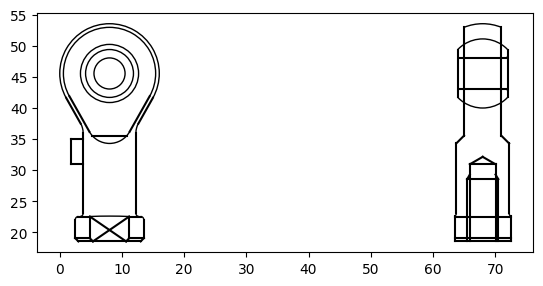

In [6]:
import ezdxf
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Arc

# DXFファイルのパス
dxf_file_path = '/home/kfujii/image-retrieval-transformers/assets/CADs/22_Screws_Bolts_Washers_Nuts/2d_SBCB/sbcb08-25.dxf'
dxf_file_path = '/home/kfujii/image-retrieval-transformers/data/dxf/03_Connecting_Parts/2d_C-PHSC/c-phsc05.dxf'

# DXFファイルを読み込み
doc = ezdxf.readfile(dxf_file_path)
msp = doc.modelspace()

# 描画の準備
fig, ax = plt.subplots()

for e in msp:
    # 中心線(CENTERやMSM_CENTERレイヤー)を除外
    if e.dxf.layer != 'CENTER' and e.dxf.layer != 'MSM_CENTER':
        if e.dxftype() == 'LINE':  # 直線
            start, end = e.dxf.start, e.dxf.end
            ax.plot([start.x, end.x], [start.y, end.y], 'k')

        elif e.dxftype() == 'CIRCLE':  # 円
            center, radius = e.dxf.center, e.dxf.radius
            circle = Circle((center.x, center.y), radius, edgecolor='k', fill=False)
            ax.add_patch(circle)

        elif e.dxftype() == 'ARC':  # 弧
            center = e.dxf.center
            radius = e.dxf.radius
            start_angle = e.dxf.start_angle
            end_angle = e.dxf.end_angle
            arc = Arc((center.x, center.y), 2*radius, 2*radius, angle=0, theta1=start_angle, theta2=end_angle, edgecolor='k')
            ax.add_patch(arc)

        elif e.dxftype() == 'POLYLINE':  # ポリライン
            points = e.points()
            x_coords = [point[0] for point in points]
            y_coords = [point[1] for point in points]
            ax.plot(x_coords, y_coords, 'k')

        elif e.dxftype() == 'LWPOLYLINE':  # 軽量ポリライン
            points = e.get_points('xy')
            x_coords = [point[0] for point in points]
            y_coords = [point[1] for point in points]
            ax.plot(x_coords, y_coords, 'k')

        elif e.dxftype() == 'SPLINE':  # スプライン
            fit_points = e.fit_points
            x_coords = [point.x for point in fit_points]
            y_coords = [point.y for point in fit_points]
            ax.plot(x_coords, y_coords, 'k')

# 軸の設定
ax.set_aspect('equal')
plt.savefig('output.jpg', dpi=300)

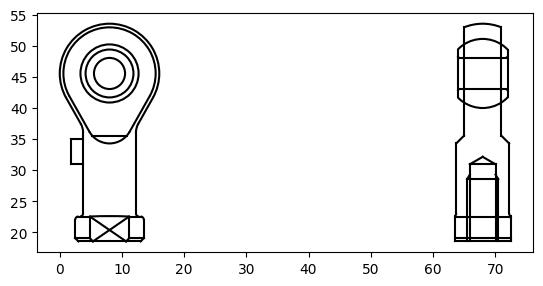

In [10]:
# 太さを統一
import ezdxf
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Arc

# DXFファイルのパス
dxf_file_path = '/home/kfujii/image-retrieval-transformers/assets/CADs/22_Screws_Bolts_Washers_Nuts/2d_SBCB/sbcb08-25.dxf'
dxf_file_path = '/home/kfujii/image-retrieval-transformers/data/dxf/03_Connecting_Parts/2d_C-PHSC/c-phsc05.dxf'


# DXFファイルを読み込み
doc = ezdxf.readfile(dxf_file_path)
msp = doc.modelspace()

# 描画の準備
fig, ax = plt.subplots()

# 線の太さを統一
line_width = 1.5

for e in msp:
    # 中心線(CENTERやMSM_CENTERレイヤー)を除外
    if e.dxf.layer != 'CENTER' and e.dxf.layer != 'MSM_CENTER':
        if e.dxftype() == 'LINE':  # 直線
            start, end = e.dxf.start, e.dxf.end
            ax.plot([start.x, end.x], [start.y, end.y], 'k', linewidth=line_width)

        elif e.dxftype() == 'CIRCLE':  # 円
            center, radius = e.dxf.center, e.dxf.radius
            circle = Circle((center.x, center.y), radius, edgecolor='k', fill=False, linewidth=line_width)
            ax.add_patch(circle)

        elif e.dxftype() == 'ARC':  # 弧
            center = e.dxf.center
            radius = e.dxf.radius
            start_angle = e.dxf.start_angle
            end_angle = e.dxf.end_angle
            arc = Arc((center.x, center.y), 2*radius, 2*radius, angle=0, theta1=start_angle, theta2=end_angle, edgecolor='k', linewidth=line_width)
            ax.add_patch(arc)

        elif e.dxftype() == 'POLYLINE':  # ポリライン
            points = e.points()
            x_coords = [point[0] for point in points]
            y_coords = [point[1] for point in points]
            ax.plot(x_coords, y_coords, 'k', linewidth=line_width)

        elif e.dxftype() == 'LWPOLYLINE':  # 軽量ポリライン
            points = e.get_points('xy')
            x_coords = [point[0] for point in points]
            y_coords = [point[1] for point in points]
            ax.plot(x_coords, y_coords, 'k', linewidth=line_width)

        elif e.dxftype() == 'SPLINE':  # スプライン
            fit_points = e.fit_points
            x_coords = [point.x for point in fit_points]
            y_coords = [point.y for point in fit_points]
            ax.plot(x_coords, y_coords, 'k', linewidth=line_width)

# 軸の設定
ax.set_aspect('equal')
plt.savefig('output.jpg', dpi=300)
